<div style="text-align: right; font-weight: bold;">
東京工科大学コンピュータサイエンス学部<br>
福西広晃
</div>

----

<span style="font-size: 250%; color: black;">5：Pythonによる実践プログラミング</span>

----

# ライブラリに関して
 - ライブラリとは、よく使う機能を関数やクラスにまとめて、簡単に使えるようにしたもの
 - ライブラリの中身のプログラムがブラックボックスであっても、入力と出力がわかっていれば簡単に実装し、実行することができる
 - Pythonに標準で組み込まれていないライブラリはインストールして使用する
```Python
pip install ライブラリ名
```

- ライブラリを使用するときは`import文`を使う
```Python
import ライブラリ名
```

- この回では、様々なライブラリをインストールしてアプリケーションを作成する 

----

# 準備

## Googleドライブにアクセス

In [1]:
#以下のコメントアウトを外してください
#from google.colab import drive
#drive.mount('/content/drive')

----

# Googleトレンドの分析
- Goolgeトレンドとは、Google検索の動向をチェックできるツール
- ユーザーニーズを把握できるため、企業のマーケティング活動にも活用可能

## ライブラリのインストール
- ライブラリ名: `pytrends`
- [Googleトレンドサイト](https://trends.google.co.jp/trends/)のデータを分析できる
- Google公式のライブラリではないためサービスが終了する可能性あり（2023/08/01現在、利用可能）
<br><br>
- ライブラリ名: `japanize-matplotlib`
- グラフの日本語対応

In [2]:
#以下のコメントアウトを外してください
#!pip install pytrends
#!pip install japanize-matplotlib

## 検索数の推移を分析
- オブジェクトを作成（日本語、日本時間の設定）
```Python
pytrends = TrendReq(hl="ja-JP", tz=540)
```
  - `hl`(host language): 日本語の場合、`jp-JP`を設定
  - `tz`(time zoon): 標準時間との時差。日本の場合、9時間=`540`分を設定
<br><br>
- データ取得の準備（キーワードのリストや期間等のパラメータを指定。後に interest_over_time 等のメソッドを使用できる状態に設定）
```Python
pytrends.build_payload(kw_list=キーリスト, cat=カテゴリ, timeframe="期間", geo="地域", gprop="フィルター")`
```
  - `kw_list`: 検索するキーワード。リストで複数指定可能
  - `cat`: 対象とするカテゴリー。これを指定すれば、検索範囲を絞ることができる。指定しない場合または0を指定した場合は、カテゴリー指定なし。[指定する値はこちらを参照](https://github.com/pat310/google-trends-api/wiki/Google-Trends-Categories)
  - `timeframe`: 対象とする期間。指定しない場合は、5年間。対象期間が270日以内の場合１日単位、270日より大きい場合1週間単位
  - `geo`: 対象とする地域。指定しない場合、全世界対象。日本のみを対象とする場合、「JP」。<br>都道府県を指定する場合、北海道「JP-01」、青森県「JP-02」、岩手県「JP-03」、宮城県「JP-04」、秋田県「JP-05」、山形県「JP-06」、福島県「JP-07」、茨城県「JP-08」、栃木県「JP-09」、群馬県「JP-10」、埼玉県「JP-11」、千葉県「JP-12」、東京都「JP-13」、神奈川県「JP-14」、新潟県「JP-15」、富山県「JP-16」、石川県「JP-17」、福井県「JP-18」、山梨県「JP-19」、長野県「JP-20」、岐阜県「JP-21」、静岡県「JP-22」、愛知県「JP-23」、三重県「JP-24」、滋賀県「JP-25」、京都府「JP-26」、大阪府「JP-27」、兵庫県「JP-28」、奈良県「JP-29」、和歌山県「JP-30」、鳥取県「JP-31」、島根県「JP-32」、岡山県「JP-33」、広島県「JP-34」、山口県「JP-35」、徳島県「JP-36」、香川県「JP-37」、愛媛県「JP-38」、高知県「JP-39」、福岡県「JP-40」、佐賀県「JP-41」、長崎県「JP-42」、熊本県「JP-43」、大分県「JP-44」、宮崎県「JP-45」、鹿児島県「JP-46」、沖縄県「JP-47」。
  - `gprop`: 対象とするフィルター。指定しない場合、「すべて」。指定する場合、images（画像）、youtube（動画）、news（ニュース）、froogle（ショッピング）
<br><br>
- 検索数の推移データを取得
```Python
pytrends.interest_over_time()
```
 - Pandasデータフレーム形式で出力
 - `検索数`: Googleトレンドのデータは特定の期間内での検索クエリの相対的な関心度を示すもの。`純粋な検索数ではなく0-100の範囲でスコア化されていることに注意`。相対的な関心度を示すため、絶対的な数値として解釈するのではなく、トレンドの変化や相対的な関心の比較に使用されることが一般的。
  - `isPartial`: Falseの場合、完全な値。Trueの場合、不完全な値（推定値）。Trueの場合は推定値のため注意が必要。
  - 十分な検索ボリュームがないキーワードは結果が表示されないことがある

In [3]:
from pytrends.request import TrendReq # Google Trendsに接続
import pandas as pd

#------------------------------------------------------------------
# 関数定義（検索数の推移データを取得）
# - 関数名：interest_over_time
# - 引数：pytrendsオブジェクト、キーワードリスト、期間、地域、カテゴリ、フィルター
# - 戻り値：検索数の推移（データフレーム）
#------------------------------------------------------------------
def interest_over_time(pytrends, kw_list, timeframe, geo, cat, gprop):
    # Googleトレンドデータを取得
    pytrends.build_payload(kw_list=kw_list, cat=cat, timeframe=timeframe, geo=geo, gprop=gprop)

    #データ取得
    df_interest_over_time = pytrends.interest_over_time()
    
    return df_interest_over_time
    
# 条件設定（各自で設定）
#------------------------------------------------------------------
kw_list   = ["東京工科大学","神奈川工科大学"] # キーワード（コンマ区切りで複数設定可能）
timeframe = "2024-04-01 2024-09-30"      # 期間：2023年上半期
geo       = "JP"                         # 地域：日本
cat       = 0                            # （必要に応じて変更）カテゴリ指定なし
gprop     = ''                           # （必要に応じて変更）フィルター指定なし
#------------------------------------------------------------------

# オブジェクト生成（ツール呼び出し）
pytrends = TrendReq(hl="ja-JP", tz=540) # 日本時間設定 

# 関数呼び出し（検索数の推移データを取得）
df_interest_over_time = interest_over_time(pytrends, kw_list, timeframe, geo, cat, gprop)

# データ表示
display(df_interest_over_time)

,東京工科大学,神奈川工科大学,isPartial
date,,,
2024-04-01,64,34,False
2024-04-02,69,30,False
2024-04-03,58,27,False
2024-04-04,100,23,False
2024-04-05,67,18,False
...,...,...,...
2024-08-08,34,16,False
2024-08-09,31,16,False
2024-08-10,26,15,False


## 検索数の推移グラフを作成

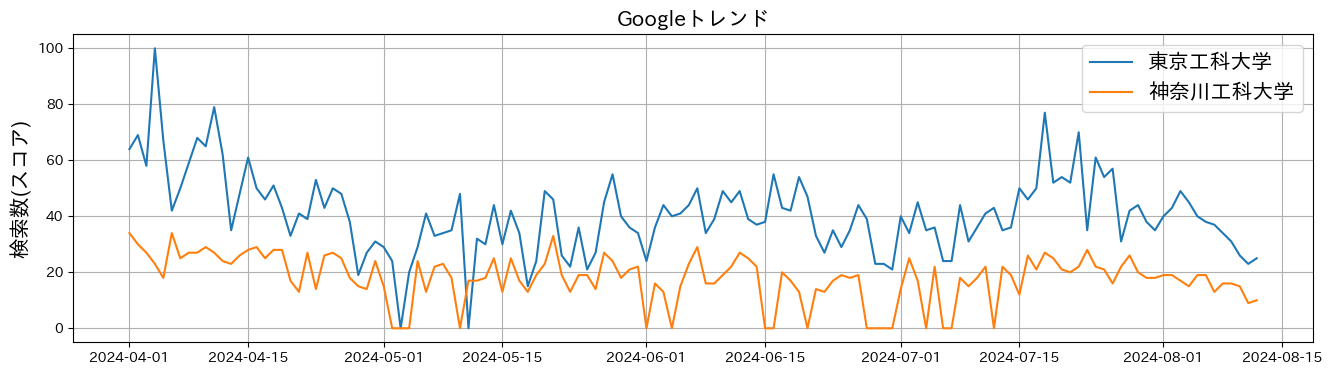

In [4]:
import matplotlib.pyplot as plt # グラフ作成
import japanize_matplotlib      # 日本語対応
%matplotlib inline

#------------------------------------------------------------------
# 関数の定義（検索数の推移グラフを作成）
# - 関数名：trend_graph
# - 引数：pytrendsオブジェクト、キーワードリスト、期間、地域、カテゴリ、フィルター
# - 戻り値：検索数の推移（データフレーム）
#------------------------------------------------------------------
def trend_graph(df_input, pngfile):    
    # グラフに使用する列名取得
    cols = df_input.columns.to_list() # 列名取得
    cols.remove("isPartial")          # 不要な「isPartial」を削除
    
    # グラフ作成前に設定するオプション
    plt.figure(figsize=(16, 4)) # 図のサイズ（横×縦）

    
    # グラフ作成(x軸、y軸、凡例タイトル、線幅、色を指定)
    date  = df_input.index     # 日付けデータを取得（インデックス）
    for i in cols:            # 列ごとのデータ取得
        score = df_input[i]
        plt.plot(date, score, label=i) 

    # 追加オプション
    plt.title("Googleトレンド",fontsize=15)   # グラフタイトル
    plt.ylabel('検索数(スコア)',fontsize=15)  # y軸ラベル
    plt.legend(fontsize=15, loc="best")       # 凡例
    plt.grid()                                # 補助線追加

    # グラフ画像の保存
    plt.savefig(pngfile, bbox_inches='tight')  
    
    # グラフ表示
    plt.show()
    

# 条件設定（各自で設定）
#------------------------------------------------------------------
df_input = df_interest_over_time       # 使用するデータフレーム名
pngfile  = "グラフ_Googleトレンド.png" # グラフ画像のファイル名
# Googleドライブの場合はコメントアウトを外す
# pngfile = "drive/My Drive/Colab Notebooks/第05回_プログラム/グラフ_Googleトレンド.png"
#------------------------------------------------------------------    

# 関数呼び出し（検索数の推移グラフを作成）
trend_graph(df_input, pngfile) # 引数: df_input,pngfile, 戻り値: なし

## 地域別検索数の分析
```Python
pytrends.interest_by_region(resolution="JP", inc_geo_code=True)
```
- Pandasデータフレーム形式で出力
- `resolution`: 地域を指定。日本の場合、`JP`
- `inc_geo_code`: geocode（都道府県コード）の追加を指定。追加したい場合、`True`

In [5]:
#------------------------------------------------------------------
# 関数設定（地域別検索数の取得）
# - 関数名：interest_by_region
# - 引数：pytrendsオブジェクト、ランキングで並び変えに使う列名
# - 戻り値：地域別検索数（データフレーム）
#------------------------------------------------------------------
def interest_by_region(pytrends, kw_list):
    # 地域別検索数の計算（kw_sortの列名を降順で並び替え）
    df_interest_by_region = pytrends.interest_by_region(resolution="JP", inc_geo_code=True).sort_values(by=kw_list[0], ascending=False)

    # 結果表示
    display(df_interest_by_region)
    
    return df_interest_by_region


# 関数呼び出し（地域別検索数の取得）
# - データ出力先：df_interest_by_region
# - kw_listはinterest_over_timeのセルで読み込み済み
df_interest_by_region = interest_by_region(pytrends, kw_list)

,geoCode,東京工科大学,神奈川工科大学
geoName,,,
三重県,JP-24,100,0
富山県,JP-16,100,0
高知県,JP-39,100,0
青森県,JP-02,100,0
秋田県,JP-05,100,0
石川県,JP-17,100,0
広島県,JP-34,100,0
岩手県,JP-03,100,0
岡山県,JP-33,100,0


## 関連キーワード別検索数の分析
```Python
related_queries = pytrends.related_queries()
```
- related_queriesは、関連キーワード別の検索数を取り出す
- 上位キーワードと急上昇キーワードを区別
- 上位キーワードの検索ランキングをデータフレームで出力: `related_queries["キーワード"]["top"]`
- 急上昇キーワードの検索ランキングををデータフレームで出力: `related_queries["キーワード"]["rising"]`

In [6]:
#------------------------------------------------------------------
# 関数設定（関連キーワード別検索数の取得）
# - 関数名：related_queries
# - 引数：pytrendsオブジェクト、キーワード
# - 戻り値：関連キーワード別別検索数（上位）、関連キーワード別別検索数（急上昇）
#------------------------------------------------------------------
def related_queries(pytrends, kw):
    # 関連キーワード別検索数の計算
    related_queries = pytrends.related_queries()

    # 上位キーワード（Top10）表示
    df_related_queries_top = related_queries[kw]["top"]       # データフレームに代入
    display(df_related_queries_top.head(10))                  # Top10表示

    # 急上昇キーワード（Top10）表示
    df_related_queries_rising = related_queries[kw]["rising"] # データフレームに代入
    display(df_related_queries_rising .head(10))              # Top10表示

    return df_related_queries_top, df_related_queries_rising

#------------------------------------------------------------------
# 条件設定（各自で設定）
#------------------------------------------------------------------
kw = "東京工科大学"    # キーワードを指定
#------------------------------------------------------------------

# 関数呼び出し（関連キーワード別検索数の取得）
# - データ出力先（上位キーワード）：df_related_queries_top
# - データ出力先（急上昇キーワード）：df_related_queries_rising
df_related_queries_top, df_related_queries_rising = related_queries(pytrends, kw)

,query,value
0,東京 工科 大学,100
1,東京 国際 工科 専門 職 大学 偏差 値,1
2,神奈川 大学 オープン キャンパス,1


,query,value
0,神奈川 大学 オープン キャンパス,950
1,東京 国際 工科 専門 職 大学 偏差 値,60


## 結果データをエクセルファイルに出力

In [7]:
#------------------------------------------------------------------
# 出力設定
#------------------------------------------------------------------
xlsxfile   = "Googleトレンド分析.xlsx" # データを出力するエクセルファイル名                    
# Googleドライブの場合はコメントアウトを外す
# xlsxfile = "drive/My Drive/Colab Notebooks/第05回_プログラム/Googleトレンド分析.xlsx"
#------------------------------------------------------------------

# df_interest_over_timeの出力（ファイル作成）
sheet_name = "検索数の推移" 
df_interest_over_time.to_excel(xlsxfile, sheet_name=sheet_name)  

# df_interest_by_regionの出力（シート追加）   
sheet_name = "地域別分析"              # シート名の指定
with pd.ExcelWriter(xlsxfile, engine="openpyxl", mode='a',  if_sheet_exists="replace") as writer:
    df_interest_by_region.to_excel(writer, sheet_name=sheet_name)
    
# df_related_queries_topの出力（シート追加）
sheet_name =  "関連キーワード分析(上位)"       # シート名の指定
with pd.ExcelWriter(xlsxfile, engine="openpyxl", mode='a',  if_sheet_exists="replace") as writer:
    df_related_queries_top.to_excel(writer, sheet_name=sheet_name)
    
# df_related_queries_risingの出力（シート追加）
sheet_name =  "関連キーワード分析(急上昇)"       # シート名の指定
with pd.ExcelWriter(xlsxfile, engine="openpyxl", mode='a',  if_sheet_exists="replace") as writer:
    df_related_queries_rising.to_excel(writer, sheet_name=sheet_name)    

## 練習
自分の興味のあるキーワードでGoogleトレンドの分析をやってみよう

(1) `interest_over_time関数`を利用して検索数の推移データを取得し、`trend_graph関数`を利用してグラフ化してみよう。
- interest_over_time関数のデータの出力先：`df_interest_over_time_2`
- trend_graph関数のグラフの出力先：`グラフ_Googleトレンド_2.png`

(2)`interest_by_region関数`を利用して地域別検索数を表示してみよう。
- interest_by_region関数のデータの出力先：`df_interest_by_region_2`

(3)`related_queries関数`を利用し関連キーワード別別検索数を表示してみよう。
- interest_by_region関数のデータの出力先：`df_related_queries_top_2`、`df_related_queries_rising_2`

(4) 結果ファイルを以下の条件でエクセルファイルに保存してみよう。
- エクセルファイル名： `Googleトレンド分析_2.xlsx`

----

# 株価分析

## ライブラリのインストール
- `pandas_datareader`: 日経平均、NASDAQ、個別銘柄の株価データ取得ライブラリ

In [8]:
#以下のコメントアウトを外してください
#!pip install pandas-datareader

## データ取得

### 日経平均の取得
- 使用ライブラリ: `pandas_datareader`
  - 第1引数：銘柄: 日経225 (コード: ^NKX)
  - 第2引数：取得サイト：stooq (各種経済データを公開しているポーランドのサイト:[stooqサイト](https://stooq.com/q/?s=%5Enkx))
  - 第3引数: 開始日：2019-06-01
  - 第4引数: 終了日: 2020-05-31
<br><br>
- `df_N225`のデータフレームにデータを代入
  - Open：始値
  - High：高値
  - Low：安値
  - Close：終値
  - Volume：出来高（取引が成立した株数）
  - 時系列データを扱う場合はインデックス（行名）に年月日が入る(通常は0,1,…)
  - 曜日の追加: `データフレーム名.index.day_name()`

In [9]:
# 使用するライブラリ
from   pandas_datareader import data
import pandas as pd
import datetime as dt # 日付型データ生成ライブラリ

#------------------------------------------------------------------
# 関数定義（株価データ取得）
# - 関数名：get_stock
# - 引数：銘柄コード、開始日、終了日
# - 戻り値：株価データ（データフレーム）
#------------------------------------------------------------------
def get_stock(code, start, end):
    #　取得データをpnadasのデータフレームに挿入
    # 時系列を昇順に並び替えるために`sort_index()`を付ける
    site  = "stooq"  # データ取得サイト
    df_stock = data.DataReader(code, site, start, end).sort_index() 

    # 曜日の追加
    df_stock["day_name"] = df_stock.index.day_name()
            
    return df_stock

# 条件設定（各自で設定）
#------------------------------------------------------------------
code  = "^NKX"               # 銘柄コード
start = dt.date(2019,6,1)    # 開始日(年, 月, 日) 
end   = dt.date(2020,5,31)   # 終了日(年, 月, 日)　
#------------------------------------------------------------------

# 関数呼び出し（株価データ取得）
df_N225 = get_stock(code, start, end)

# 表示
display(df_N225) 

,Open,High,Low,Close,Volume,day_name
Date,,,,,,
2019-06-03,20327.87,20438.03,20305.74,20410.88,695247100,Monday
2019-06-04,20435.86,20464.57,20290.16,20408.54,713001500,Tuesday
2019-06-05,20667.89,20800.64,20646.15,20776.10,744705100,Wednesday
2019-06-06,20745.84,20842.28,20745.84,20774.04,614232500,Thursday
2019-06-07,20859.78,20907.06,20817.07,20884.71,522701300,Friday
...,...,...,...,...,...,...
2020-05-25,20653.41,20741.65,20584.06,20741.65,550881700,Monday
2020-05-26,20927.96,21327.86,20918.11,21271.17,871911300,Tuesday
2020-05-27,21249.31,21473.68,21143.37,21419.23,1120168200,Wednesday


### 個別銘柄の株価の取得
- [個別銘柄のコード取得](https://quote.jpx.co.jp/jpx/template/quote.cgi?F=tmp/stock_search)
  - 例: トヨタ自動車：`7203`
  - codeに代入する場合、コードの後ろに`.JP`を付ける：`7203.JP`
  <br><br>
- `df_stock`のデータフレームにデータを代入

In [10]:
#------------------------------------------------------------------
# 条件設定（各自で設定）
#------------------------------------------------------------------
code  = "7203.JP"            # 銘柄コード
start = dt.date(2019,6,1)    # 開始日(年, 月, 日) 
end   = dt.date(2020,5,31)   # 終了日(年, 月, 日)　
#------------------------------------------------------------------

# 関数呼び出し（株価データ取得）
df_stock = get_stock(code, start, end)

# 表示
display(df_stock) 

,Open,High,Low,Close,Volume,day_name
Date,,,,,,
2019-06-03,1223.56,1231.12,1217.54,1230.15,29122660,Monday
2019-06-04,1231.70,1237.52,1216.77,1235.00,26163475,Tuesday
2019-06-05,1252.65,1268.94,1251.10,1266.42,28984990,Wednesday
2019-06-06,1267.39,1277.28,1263.90,1269.71,21423820,Thursday
2019-06-07,1277.47,1282.13,1271.65,1277.66,18177945,Friday
...,...,...,...,...,...,...
2020-05-25,1277.00,1279.00,1267.20,1276.60,15351500,Monday
2020-05-26,1288.00,1336.00,1285.20,1329.80,38703000,Tuesday
2020-05-27,1328.00,1355.00,1318.40,1348.00,38496500,Wednesday


### 練習
上記のセルの設定を書き換えて、興味のある企業の株価を取得してみよう
- 個別銘柄のコードは次のサイトで検索 [個別銘柄のコード取得](https://quote.jpx.co.jp/jpx/template/quote.cgi?F=tmp/stock_search)
- 取得期間：`2019-06-01`から`2020-05-31`
- 取得したデータフレームは`df_stock`のデータフレームに代入

----

## 時系列グラフ作成

### 日経平均（終値）の時系列グラフを作成

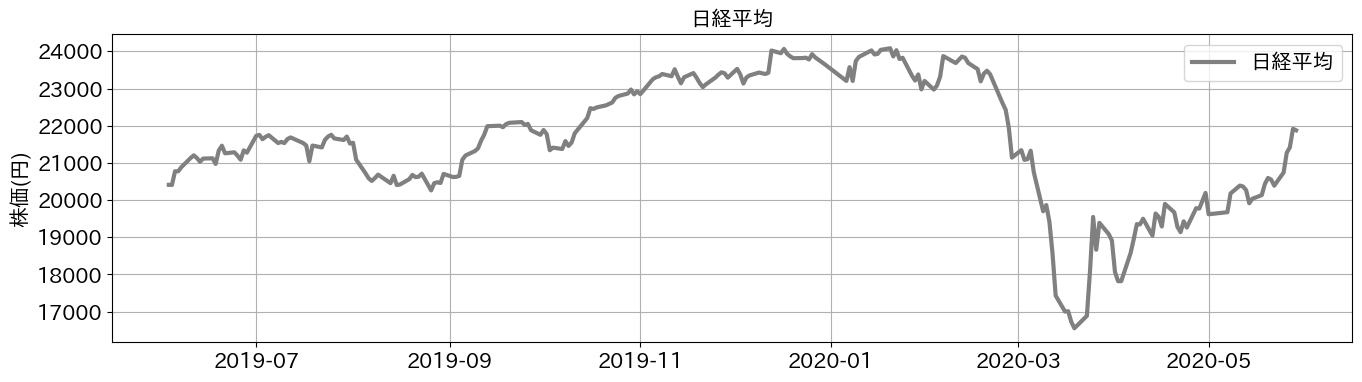

In [11]:
import matplotlib.pyplot as plt # グラフ作成
import japanize_matplotlib      # 日本語対応
%matplotlib inline

#------------------------------------------------------------------
# 関数定義（時系列グラフ作成）
# - 関数名：stock_graph
# - 引数：株価データ（データフレーム）、グラフタイトル、画像ファイル名
# - 戻り値：なし
#------------------------------------------------------------------
def stock_graph(df_input, title, pngfile):
    # データ取得
    date  = df_input.index    # 日付けデータを取得（インデックス）
    price = df_input["Close"] # 列データを取得
    
    # グラフ作成前に設定するオプション
    plt.figure(figsize=(16, 4)) # 図のサイズ（横×縦）

    # グラフ作成(x軸、y軸、凡例タイトル、線幅、色を指定)
    plt.plot(date, price, label=title, linewidth = 3, color = 'gray') 

    # 追加オプション
    plt.title(title,fontsize=15)              # グラフタイトル
    plt.ylabel('株価(円)',fontsize=15)        # y軸ラベル
    plt.xticks(fontsize=15)                   # x軸の目盛文字サイズ
    plt.yticks(fontsize=15)                   # y軸の目盛文字サイズ
    plt.legend(fontsize=15, loc="best")       # 凡例
    plt.grid()                                # 補助線追加

    # グラフ画像の保存
    plt.savefig(pngfile, bbox_inches='tight')  
    
    # グラフ表示
    plt.show()

#------------------------------------------------------------------
# 条件設定（各自で設定）
#------------------------------------------------------------------
df_input = df_N225     # 使用するデータフレーム名
title    = "日経平均"  # グラフのタイトル
#------------------------------------------------------------------   

# 出力設定
pngfile  = "グラフ_株価_日経平均.png" # グラフ画像のファイル名

# Googleドライブの場合は次のコメントアウトを外す
# pngfile = "drive/My Drive/Colab Notebooks/第05回_プログラム/グラフ_株価_日経平均.png"
  
# 関数呼び出し（時系列グラフ作成）
stock_graph(df_input, title, pngfile) 

### 練習
株価の最初の練習で取得した`df_stock`の終値の時系列グラフを作成しよう。`stock_graph関数`を使用するものとする。

## 時系列データの集計
- 集計方法（Pandasのresamleを利用）
``` Python
データフレーム名["列名"].resample("集計単位").agg(["処理1", "処理2", ・・・])
```    
- 集計単位

||||
|:-:|:-:|:-:|
|指定方法 |内容 |区切り位置 |
|AS       |年   |年初       |
|A        |年   |年末       |
|MS       |月   |月初       |
|M        |月   |月末       |
|W        |週   |日曜日     |
|D        |日   |0時        |
|H        |時   |0分        |
|T        |分   |0秒        |
|S        |秒   |           |
||||

|||
|:-:|:-:|
|主な処理   |内容    |
|min        |最小    |
|max        |最大    |
|sum        |合計    |
|mean       |平均    |
|first      |最初の値|
|interpolate|補間    |
|||

### 月間の平均値、最小値、最大値の集計
- 対象データ: `df_N225`（日経平均）の`Close`（終値）
- 集計単位: M
- 処理: mean, min, max
- 集計結果を代入するデータフレーム名: `df_N225_M`

In [13]:
import pandas as pd

# 月間の平均値、最小値、最大値の集計
df_N225_M = df_N225["Close"].resample("M").agg(["mean", "max", "min"])

# 表示
display(df_N225_M)

,mean,max,min
Date,,,
2019-06-30,21060.207000,21462.86,20408.54
2019-07-31,21593.676364,21756.55,21046.24
2019-08-31,20629.677143,21540.99,20261.04
2019-09-30,21585.458947,22098.84,20620.19
2019-10-31,22197.474762,22974.13,21341.74
2019-11-30,23278.087500,23520.01,22850.77
2019-12-31,23660.375714,24066.12,23135.23
2020-01-31,23642.921579,24083.51,22977.75
2020-02-29,23180.366111,23873.59,21142.96


### n日ごとの平均値、最小値、最大値の集計
- 対象データ: `df_N225`（日経平均）の`Close`（終値）
- 集計単位: nD (90日の場合：90D) 
- 処理: mean, min, max
- 集計結果を代入するデータフレーム名: `df_N225_90D`

In [14]:
# 90日ごとのの平均値、最小値、最大値の集計
df_N225_90D = df_N225["Close"].resample("90D").agg(["mean", "max", "min"])

# 表示
display(df_N225_90D)

,mean,max,min
Date,,,
2019-06-03,21102.987937,21756.55,20261.04
2019-09-01,22363.874000,23520.01,20620.19
2019-11-30,23547.140877,24083.51,21948.23
2020-02-28,19473.847458,21419.23,16552.83
2020-05-28,21897.100000,21916.31,21877.89


### 練習

株価の最初の練習で取得した`df_stock`の終値に関して、年単位の平均値、最小値、最大値を集計してみよう
- 対象データ: `df_stock`の`Close`（終値）
- 集計単位: `A`
- 処理: `mean`, `min`, `max`
- 集計結果を代入するデータフレーム名: `df_stock_A`

----

## 移動平均の分析

### 移動平均の計算
- 移動平均は、ある一定区間ごとの平均値を区間をずらしながら求めたもの
- 移動平均のグラフを作成すると、長期的な傾向を表す滑らかな曲線が得られる
- 今回は、終値(Close)の5日平均（短期傾向）、25日平均（中期傾向）、50日平均（長期傾向）を求める
- 集計方法（pandasのrollingを使用）
```Python
データフレーム名["列名"].rolling(window=日数).mean()
```

**日経平均の終値の移動平均**

In [16]:
import pandas as pd

#------------------------------------------------------------------
# 関数定義（移動平均の計算）
# - 関数名：sma
# - 引数：株価データ（データフレーム）、短期日数、中期日数、長期日数
# - 戻り値：移動平均を含む株価データ（データフレーム）
#------------------------------------------------------------------
def sma(df_input, span_short, span_midium, span_long):
    # 移動平均の結果を代入（単純移動平均線（SMA,Simple Moving Average）
    df_input['sma_short']  = df_input['Close'].rolling(window=span_short).mean()
    df_input['sma_midium'] = df_input['Close'].rolling(window=span_midium).mean()
    df_input['sma_long']   = df_input['Close'].rolling(window=span_long).mean()
    
    return df_input

#------------------------------------------------------------------
# 条件設定（各自で設定）
#------------------------------------------------------------------
df_input    = df_N225     # 使用するデータフレーム名
span_short  =  5          # 移動平均（短期）の日数
span_midium = 25          # 移動平均（中期）の日数
span_long   = 50          # 移動平均（長期）の日数
#------------------------------------------------------------------

# 関数呼び出し（移動平均の計算）
df_sma_N225 = sma(df_input, span_short, span_midium, span_long)

# 表示
display(df_sma_N225)     

,Open,High,Low,Close,Volume,day_name,sma_short,sma_midium,sma_long
Date,,,,,,,,,
2019-06-03,20327.87,20438.03,20305.74,20410.88,695247100,Monday,NaN,NaN,NaN
2019-06-04,20435.86,20464.57,20290.16,20408.54,713001500,Tuesday,NaN,NaN,NaN
2019-06-05,20667.89,20800.64,20646.15,20776.10,744705100,Wednesday,NaN,NaN,NaN
2019-06-06,20745.84,20842.28,20745.84,20774.04,614232500,Thursday,NaN,NaN,NaN
2019-06-07,20859.78,20907.06,20817.07,20884.71,522701300,Friday,20650.854,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-05-25,20653.41,20741.65,20584.06,20741.65,550881700,Monday,20542.144,19942.3616,19196.3828
2020-05-26,20927.96,21327.86,20918.11,21271.17,871911300,Tuesday,20709.688,20011.2048,19224.4638
2020-05-27,21249.31,21473.68,21143.37,21419.23,1120168200,Wednesday,20874.504,20096.3660,19264.5272


**移動平均の日数分のデータ集まった時に平均値が計算できるので、前半はNaN(欠損)となる**<Br>
**例えば、5日移動平均の場合、5日目から値が得られる**

### 移動平均のグラフ作成

**日経平均の終値の移動平均グラフ**

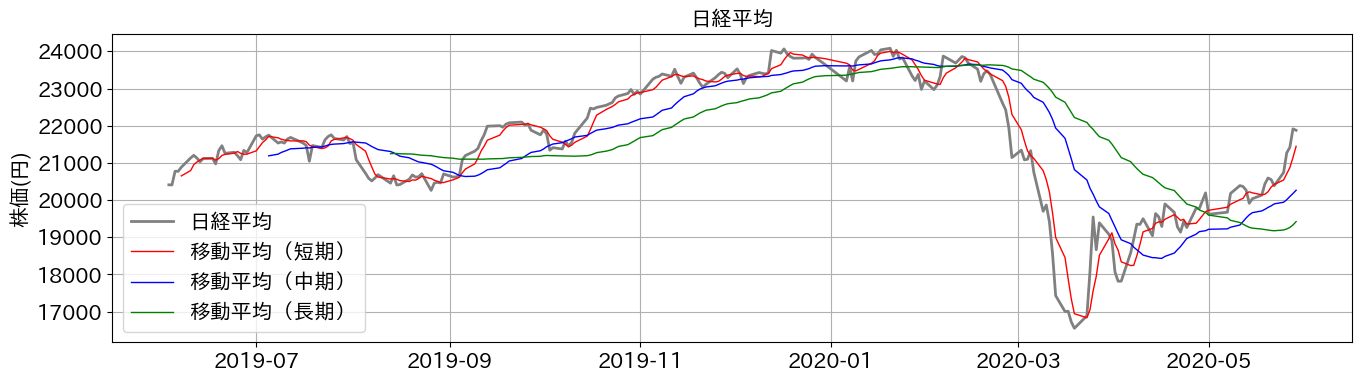

In [17]:
import matplotlib.pyplot as plt # グラフ作成
import japanize_matplotlib      # 日本語対応
%matplotlib inline

#------------------------------------------------------------------
# 関数の定義（移動平均のグラフ作成）
# - 関数名：sma_graph
# - 引数：株価データ（データフレーム）、グラフタイトル、画像ファイル名
# - 戻り値：移動平均を含む株価データ（データフレーム）
#------------------------------------------------------------------
def sma_graph(df_input, title, pngfile):
    # データ取得
    date       = df_input.index         # 日付けデータを取得（インデックス）
    price      = df_input["Close"]      # 終値データを取得
    sma_short  = df_input["sma_short"]  # 短期移動平均データを取得
    sma_midium = df_input["sma_midium"] # 短期移動平均データを取得
    sma_long   = df_input["sma_long"]   # 短期移動平均データを取得
    
    # グラフ作成前に設定するオプション
    plt.figure(figsize=(16, 4)) # 図のサイズ（横×縦）

    # グラフ作成(x軸、y軸、凡例タイトル、線幅、色を指定)
    plt.plot(date, price,      label = title,              linewidth = 2, color = 'gray') 
    plt.plot(date, sma_short,  label = '移動平均（短期）', linewidth = 1, color = 'red')
    plt.plot(date, sma_midium, label = '移動平均（中期）', linewidth = 1, color = 'blue')
    plt.plot(date, sma_long,   label = '移動平均（長期）', linewidth = 1, color = 'green')

    # 追加オプション
    plt.title(title,fontsize=15)               # グラフタイトル
    plt.ylabel('株価(円)',fontsize=15)        # y軸ラベル
    plt.xticks(fontsize=15)                   # x軸の目盛文字サイズ
    plt.yticks(fontsize=15)                   # y軸の目盛文字サイズ
    plt.legend(fontsize=15, loc="best")       # 凡例
    plt.grid()                                # 補助線追加

    # グラフ画像の保存
    plt.savefig(pngfile, bbox_inches='tight')  
    
    # グラフ表示
    plt.show
    
#------------------------------------------------------------------
# 条件設定（各自で設定）
#------------------------------------------------------------------
df_input = df_sma_N225                     # 使用するデータフレーム名
title    = "日経平均"                      # グラフタイトル（企業名など）
#------------------------------------------------------------------

# 出力設定
pngfile  = "グラフ_移動平均_日経平均.png" # グラフ画像のファイル名

# Googleドライブの場合はコメントアウトを外す
# pngfile = "drive/My Drive/Colab Notebooks/第05回_プログラム/グラフ_移動平均_日経平均.png"
    
# 関数呼び出し（移動平均のグラフ作成）
sma_graph(df_input, title, pngfile) 

### 結果の見方（売り買いのサイン）
- `ゴールデンクロス`：短期移動平均が中期または長期平均を下から上に超えたとき → `買いサイン`
- `デッドクロス`：短期移動平均が中期または長期平均を上から下に超えたとき → `売りサイン`
<br><br>
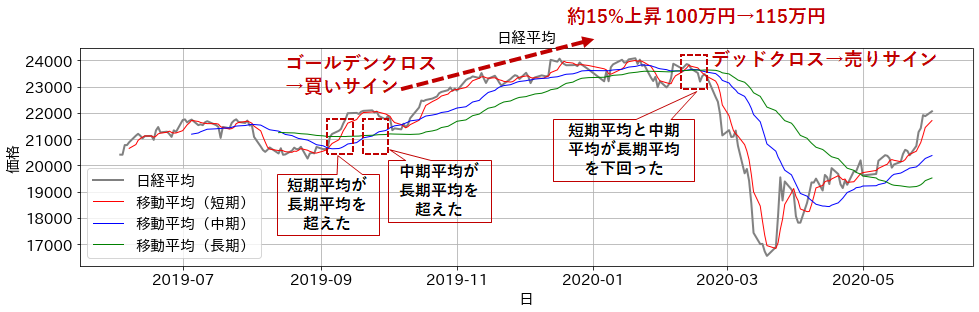

### 練習
株価の最初の練習で取得した`df_stock`の終値の移動平均グラフを作成し、`ゴールデンクロス`や`デットクロス`があるかを確かめてみよう

(1) `sma関数`を利用して移動平均を計算し、`df_sma_stock`のデータフレームに代入しよう

(2)`df_sma_stock`対して`sma_graph関数`を利用し、移動平均グラフを作成しよう

## 結果データをエクセルファイルに出力

In [20]:
#------------------------------------------------------------------
# 出力設定
#------------------------------------------------------------------
xlsxfile   = "株価分析.xlsx" # データを出力するエクセルファイル名 

# Googleドライブの場合はコメントアウトを外す
# xlsxfile = "drive/My Drive/Colab Notebooks/第05回_プログラム/株価分析.xlsx"
#------------------------------------------------------------------

# df_N225の出力（ファイル作成）
sheet_name = "株価_日経平均"      # シート名の指定
df_N225.to_excel(xlsxfile, sheet_name=sheet_name) 

# df_stockの出力(シート追加)
sheet_name = "株価_トヨタ"      # シート名の指定
with pd.ExcelWriter(xlsxfile, engine="openpyxl", mode='a',  if_sheet_exists="replace") as writer:
    df_stock.to_excel(writer, sheet_name=sheet_name) 

----